# Marathon Time Prediction

## Content

1. Introduction
2. Import Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
5. Data Preprocessing
6. Model Definition
7. Model Training
8. Model Evaluation
9. Model Saving
10. Model Inference
11. Conclusion

##  1. Introduction 

#### Name : Abdurrahman Shiddiq Thaha

### 1.1 Background

Every Marathoner has a time goal in mind, and this is the result of all the training done in months of exercises. Long runs, Strides, Kilometers and phisical exercise, all add improvement to the result. Marathon time prediction is an art, generally guided by expert physiologists that prescribe the weekly exercises and the milestones to the marathon.
Unfortunately, Runners have a lot of distractions while preparing the marathon, work, family, illnes, and therefore each one of us arrives to the marathon with his own story.
The "simple" approach is to look at data after the competition, the Leaderboard.

But what if we could link the Marathon result to the training history of the Athlete? Could we find that "non orthodox" training plans give good results?

### 1.2 Problem Statement

Create a regression model to predict marathon time with the provided dataset.

## 2. Import Libraries 

These are libraries that are used in this assignment:

- pandas : Used to load and process data

- numpy : Used to do mathematical calculation necessary in the data analysis

- matplotlib : Used to visualize data

- seaborn : Used to do an alternative data visualization

- sklearn : Used to do machine learning procedure

- xgboost : used to utilize XGBoost algorithm

- lightbm : used to utilize LGBM algorith

- pickle : used to create .pkl file for deployment

- scipy.stats : Used to do statistical calculation

- warnings : Used to ignore any warning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pickle
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import scipy.stats as st
import warnings

warnings.simplefilter('ignore')

# enable inline plotting
%matplotlib inline


sns.set_style(style='white')

# set the max columns to none
pd.set_option('display.max_columns', None)

# set the random seed
np.random.seed(420)

## 3. Data Loading 

We have been provided with 1 dataset . The description for what the dataset contain is given below: 


- **MarathonData.csv** : A dataset which contains athlete's training history and their marathon time.

The details of the dataset can be seen here [Here](https://www.kaggle.com/datasets/girardi69/marathon-time-predictions)

### • Data Description

| Variable | Definition | Description |
| --- | --- | --- |
| Marathon | name of the marathon event and its year | |
| Name | Athlete's name  |  |
| Category | the sex and age group of a runner | MAM: Male < 40, WAM: Female < 40, M(Number): Male > number  |
| km4week | total number of kilometers run in the last 4 weeks before the marathon, marathon included | If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon |
| sp4week | The average speed of the athlete in the last 4 training weeks | KM/H |
| CrossTraining | If the runner is also a cyclist, or a triathlete | boolean |
| Wall21 | Personal Best Half marathon time | in hour |
| Marathon time | Marathon finish time  | in hour |
| CATEGORY | Group of runner based on marathon time | A: results under 3h, B: results between 3h and 3h20m, C: results between 3h20m and 3h40m, D: results between 3h40 and 4h |

In [2]:
# Loading data
df = pd.read_csv('MarathonData.csv')

In [3]:
# Duplicate Dataset
df_copy = df.copy()

In [4]:
# Checking the shape of the dataset
df.shape

(87, 10)

This dataset has 87 rows and 10 columns (1 Target and 9 features)

In [5]:
# Look at the first 3 rows
df_copy.head(3)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A


In [6]:
# Look at the last 3 rows
df_copy.tail(3)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D
86,87,Prague17,Pavel ?imek,M40,17.9,10.848485,ciclista 5h,2.05,3.98,D


In [7]:
# Show concise summary of the data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


- there are 1 column that have null values (`CrossTraining`)
- there are 6 columns with object datatype, 3 columns with float64 datatype and 1 columns with int64 datatype

### • Convert not NaN missing value to NaN

In [8]:
df_copy['Wall21'].replace({' -   ': np.nan}, inplace=True)

### • Changing datatype

`Wall21`: object -> float64

In [9]:
df_copy['Wall21'] = df_copy['Wall21'].astype('float64')

In [10]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


After changing the not NaN missing value and datatype we are ready to move on

### • Checking for duplicate

In [11]:
# Checking if the dataset have duplicate
df_copy.shape[0] - df_copy.drop_duplicates().shape[0]

0

There is not duplicate data

### • Splitting data train and data test

Splitting data into data train and test with a ratio of 80/20

In [12]:
# split train and test data
train, test = train_test_split(df_copy, test_size=0.2)

In [13]:
train.shape

(69, 10)

In our data train we have 78 rows and 10 columns (10 Target and 9 features)

In [14]:
test.shape

(18, 10)

In our data train we have 9 rows and 10 columns (1 Target and 9 features)

In [15]:
# Generate some descriptive statistics of numerical data
train.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,69.000000,69.000000,69.000000,64.000000,69.000000
mean,45.173913,61.098551,173.197841,1.639844,3.341304
std,26.242622,26.478507,1337.831372,0.217908,0.384206
min,2.000000,17.900000,8.337931,1.230000,2.590000
25%,23.000000,41.600000,11.472527,1.472500,3.050000
50%,47.000000,54.200000,12.170040,1.620000,3.330000
75%,69.000000,76.800000,12.943820,1.777500,3.650000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


We can see above, it seems there is an anomaly in `sp4week`

## 4. Exploratory Data Analysis (EDA)

There are 3 datatypes in the dataset:

1. Target: `MarathonTime`

2. Numerical: `km4week`, `sp4week`, `Wall21`

3. Categorical: `Marathon`, `Name`, `Category`, `CrossTraining`, `CATEGORY`



For each datatype, we will do different data exploration

### • Target

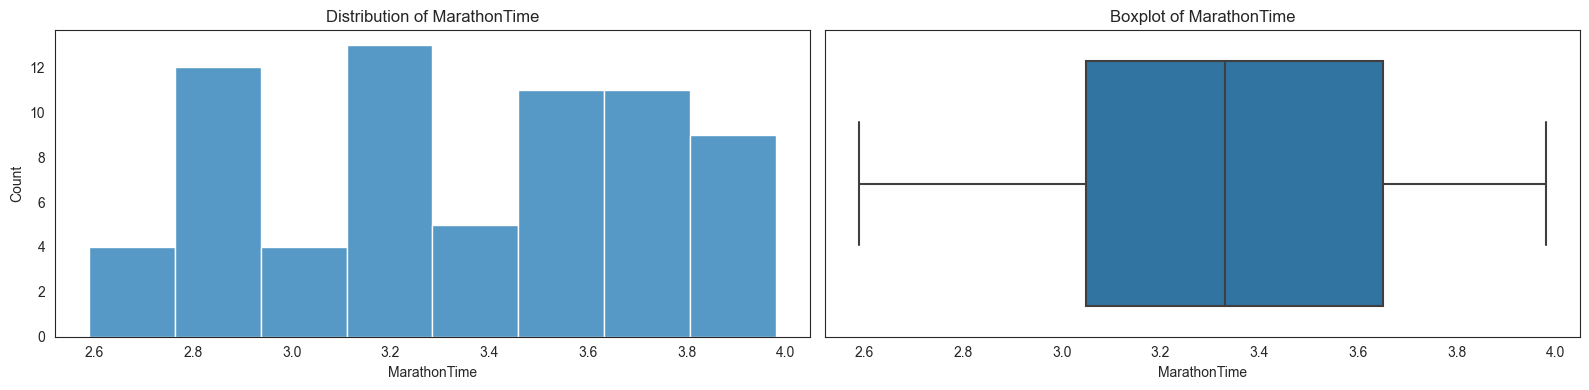

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

_ = sns.histplot(x=train['MarathonTime'], ax=axes[0])
axes[0].set_title(f'Distribution of MarathonTime')
        
_ = sns.boxplot(x=train['MarathonTime'], ax=axes[1])
axes[1].set_title(f'Boxplot of MarathonTime');

plt.tight_layout()

We can see that the distribution of marathon time looks like a uniform distribution, and it can be caused by the fact that the data that we are working with is not sufficient.

### • Numerical

For numerical data type, we will see the distribution of each column and correlation among each column plus the target


Numerical : `km4week`, `sp4week`, `Wall21`

In [17]:
# defining a function to plot the distribution of data
def plot_numerical(df, feature, length=16, wide=14):
    fig, axes = plt.subplots(len(feature), 2, figsize=(length, wide))
    for c, ax in zip(feature, axes):
        skew = df[c].skew()
        
        _ = sns.histplot(x=df[c], ax=ax[0], bins='auto')
        ax[0].set_title(f'Distribution of {c} (skewness = {skew:.3f})')
        
        
        _ = sns.boxplot(x=df[c], ax=ax[1])
        ax[1].set_title(f'''Boxplot of {c}''')
        sns.despine()
        
    plt.tight_layout()
    
# defining a function to plot the correlation of features and target
def plot_heatmap(df, feature, target):
    plt.figure(figsize=(10,6))
    
    _ = sns.heatmap(pd.concat([df[feature], df[target]], axis=1).corr(), annot=True, annot_kws={"fontsize":13});
    _.set_title(f'Correlation heatmap')

In [18]:
num_col = ['km4week', 'sp4week', 'Wall21']

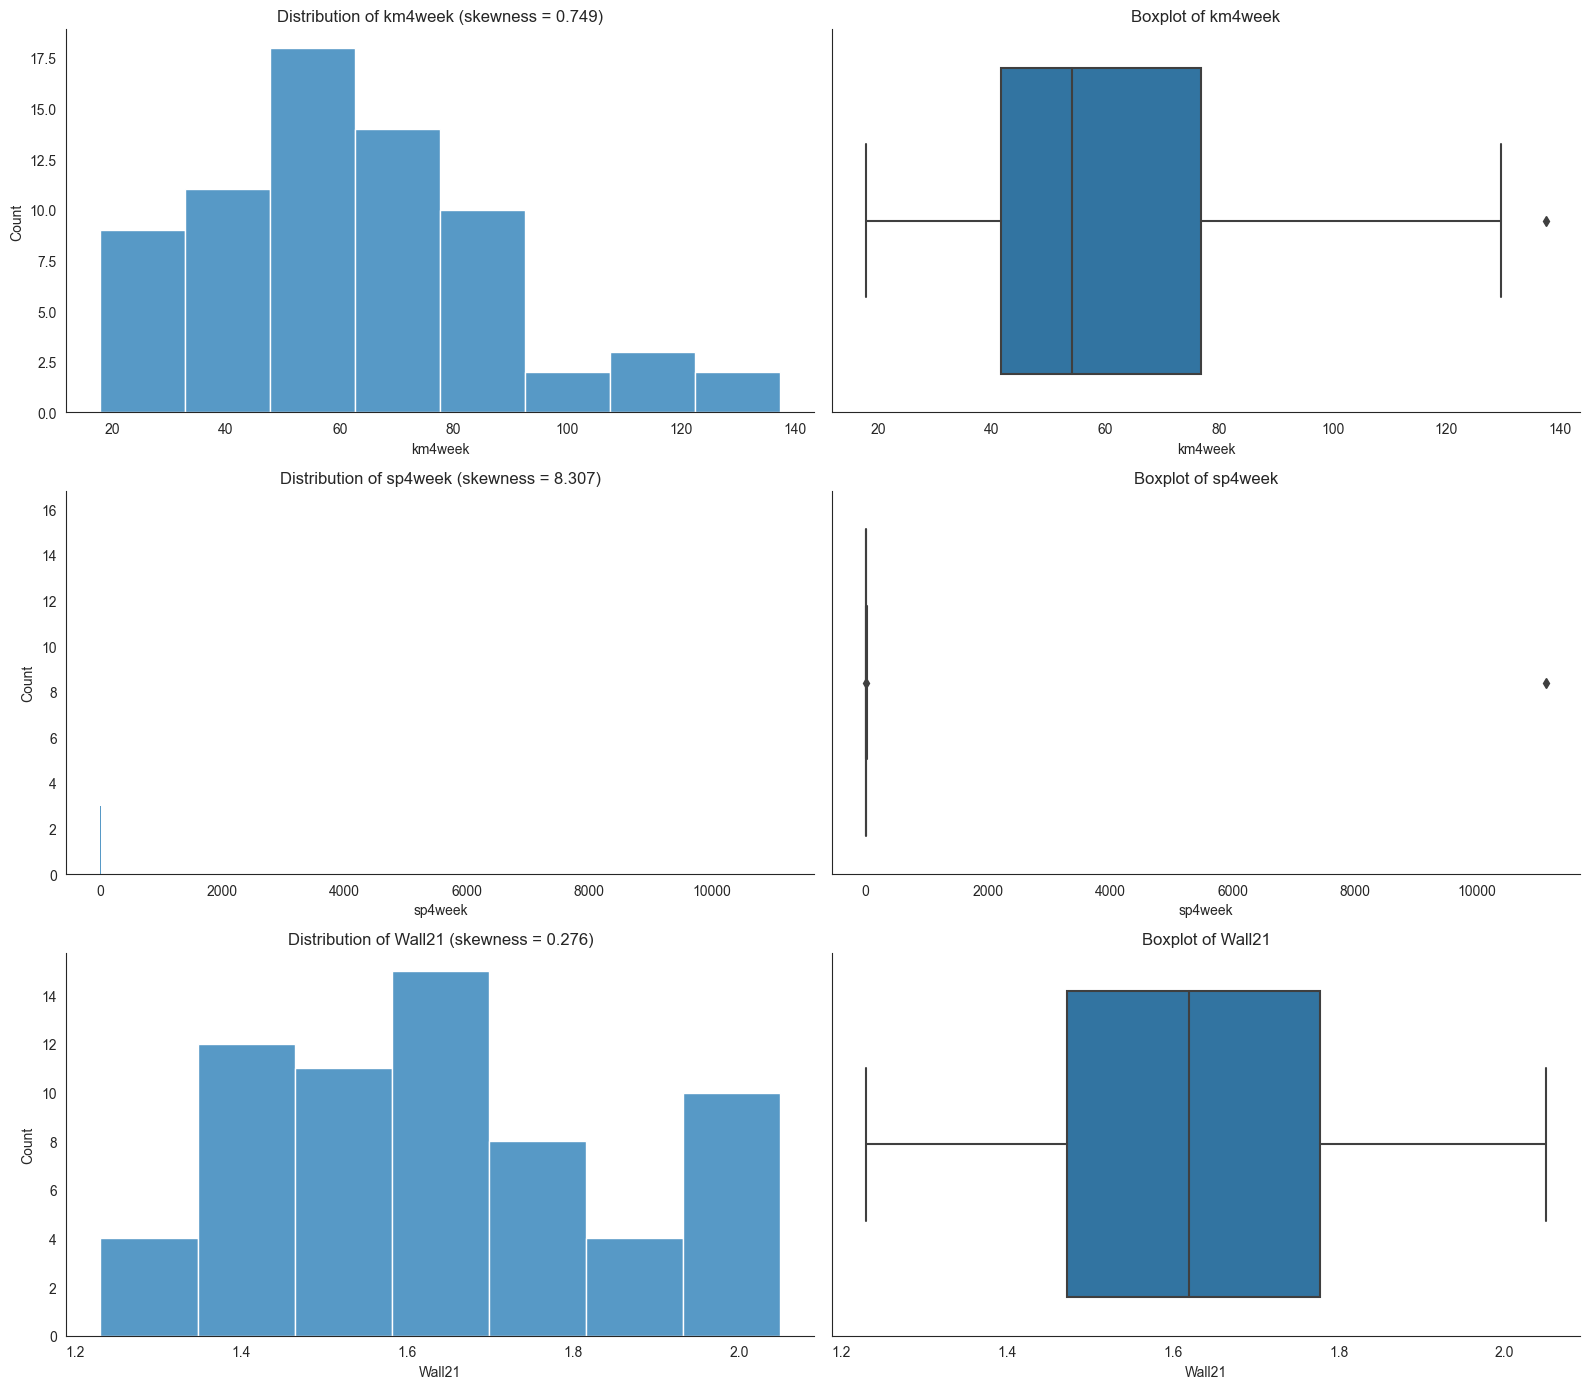

In [19]:
plot_numerical(train, num_col)

The most intriguing thing from the figure above is in fact the `sp4week`, as what we have mentioned before, there is an anomaly is this feature whereas a really illogical huge value (more that 10000) is in the data. For the other features, they look kind of normal.

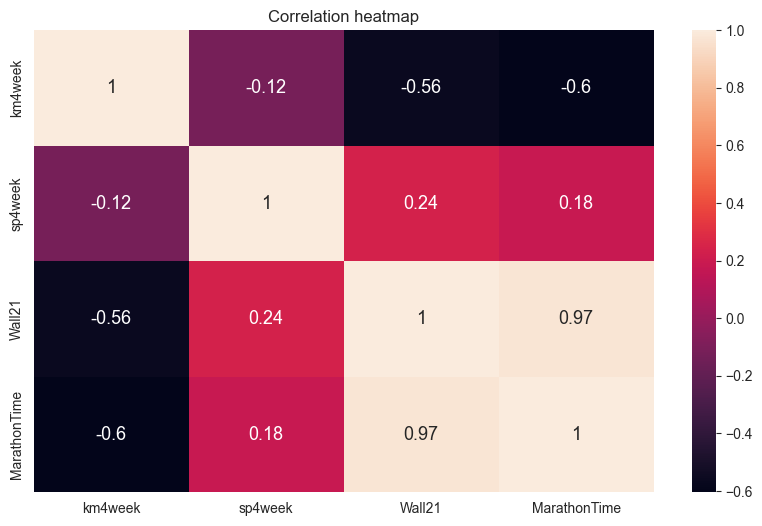

In [20]:
plot_heatmap(train, num_col, 'MarathonTime')

Interestingly, There is a massive correlation between wall21 and Marathon time which of course makes a lot of sense since if you run fast for the fist 21 KM, you are likely to finish early at the finish line. About the information of training history, it appears that both of them are somewhat correlated with the `MarathonTime` especially `km4week`.

One more thing need to be pointed out is the correlation between `km4week` and `Wall21` which is quite prominent although it is not as big as the value we need to be worry about.

### • Categorical

Categorical Columns: `Marathon`, `Name`, `Category`, `CrossTraining`, `CATEGORY`

We will not use `Marathon` and `Name` since both of that data doesn't give any useful information. Also we will leave out `CATEGORY` since it is derived from the marathon time which will do a data leak.

In [21]:
cat_cols = ['Category', 'CrossTraining']

NameError: name 'cat_cols' is not defined

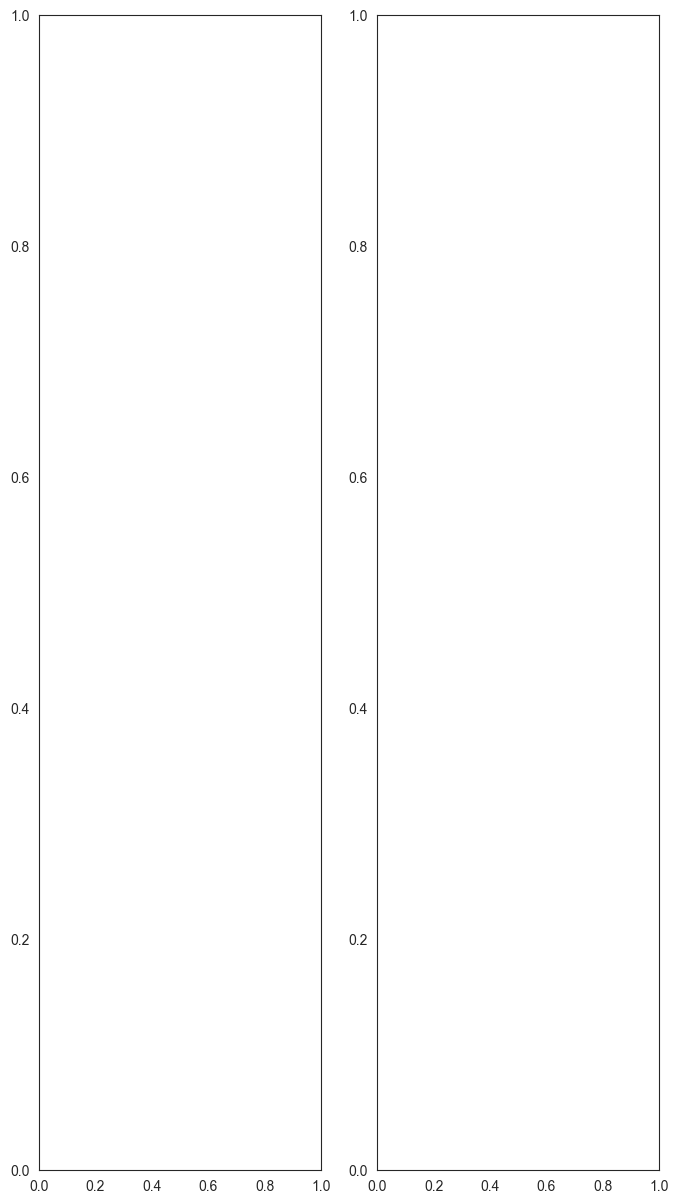

In [38]:
# create a function to only show the label when it's > 5%
def autopct(pct): 
    return ('%1.1f%%' % pct) if pct > 5 else ''

fig, axes = plt.subplots(1, 2, figsize=(8,15))

# flat the axes to be in one line of list
axes = axes.flatten()

# Use for loop to plot all of the categorical data into pie chart
for c, ax in zip(cat_cols, axes):
    _ = train[c].value_counts().sort_values(ascending=False).plot(kind='pie', fontsize=10, autopct=autopct, ax=ax, title=c);
    _ = ax.set_ylabel('')
_ = plt.tight_layout()

based on the figure above, we can see that there are 2 features with 1 possible categories, 1 features with 6 possible categories

In order to find correlation between the categorical features and our target which is continuous, we will use point biserial correlation.

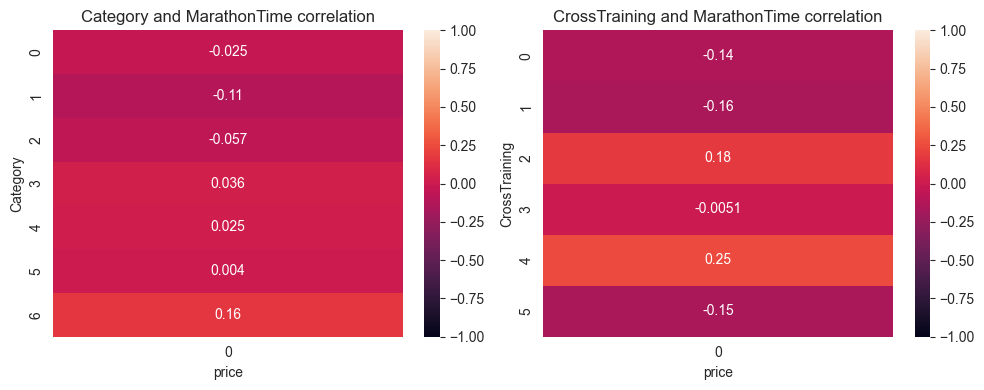

In [23]:
# encoding the categorical data
encoder = OneHotEncoder()

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# flat the axes to be in one line of list
axes = axes.flatten()

# use for loop to encode the data and plot it into a heatmap
for c, ax in zip(cat_cols, axes):
    heatmap = []
    encoder_df = pd.DataFrame(encoder.fit_transform(train[[c]]).toarray())
    for cat in encoder_df:
        heatmap.append(st.pointbiserialr(encoder_df[cat], train['MarathonTime'])[0])
        
    _ = sns.heatmap(np.array(heatmap).reshape(-1,1), annot=True, ax=ax, vmin=-1, vmax=1);
    _.set(ylabel=c, xlabel='price')
    _.set_title(f'{c} and MarathonTime correlation')

    plt.tight_layout()

From the visualization of the biserial correlation above, both categorical data have some categories which have a relatively significant correlation with `MarathonTime`. For instance, number 1 and 6 for `Category` and almost every category in `Crosstraining`

### • Feature Selection

Based in the Exploratory Data Analysis that we have done, we consider to include these feature(s) for our regression model:

- `km4week`, `sp4week` and `Wall21` : Have a relatively significant correlation with the target
- `Category` and `CrossTraining` : Have some relatively significant  biserial correlation with the target.

In [24]:
feature_num = ['km4week', 'sp4week', 'Wall21']
feature_cat = ['Category', 'CrossTraining']
target = ['MarathonTime']

In [25]:
# select feature for train and test data
train_selected = train[feature_num + feature_cat + target]
test_selected = test[feature_num + feature_cat + target]
train_selected.head(3)

,km4week,sp4week,Wall21,Category,CrossTraining,MarathonTime
78,28.0,11.200000,1.97,MAM,NaN,3.89
30,52.5,12.549801,1.62,MAM,ciclista 3h,3.19
21,67.3,13.239344,1.50,M40,NaN,3.04


In [26]:
print('Train Size : ', train_selected.shape)
print('Test Size  : ', test_selected.shape)

Train Size :  (69, 6)
Test Size  :  (18, 6)


## 5. Data Preprocessing

### • Data for model inference

In [27]:
# Create a synthetic Data for Model Inference

df_inf = pd.DataFrame({
    'km4week': [100.3,70.2,60.3],
    'sp4week': [11.043189,12,10],
    'Wall21': [2.1, 1.92, 2.30],
    'Category': ['MAM', 'M40', 'WAM'],
    'CrossTraining': ['yes', 'no', 'yes'],
    })

df_inf.head(3)

,km4week,sp4week,Wall21,Category,CrossTraining
0,100.3,11.043189,2.10,MAM,yes
1,70.2,12.000000,1.92,M40,no
2,60.3,10.000000,2.30,WAM,yes


### • Handling outliers

In [28]:
# Defining a function to analyze outlier in the data

def outlier_analysis(df, col):
    skewness = df[col].skew()
    if skewness >= 0.5 and skewness<=0.5:
        upper = df[col].mean() + 3*df[col].std()
        lower = df[col].mean() - 3*df[col].std()
        method = 'Z-Score'
    else:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        iqr = q3 - q1
        upper_bound = q3 + (iqr * 3)
        lower_bound = q1 - (iqr * 3)
        method = 'IQR'

    outlier = df.loc[(df[col] > upper_bound) | (df[col] < lower_bound)]
    
    return outlier, method, upper_bound, lower_bound

In [29]:
# using for loop to go through every numerical column and handle their outliers
for col in feature_num:
    out, method, up, low = outlier_analysis(train_selected, col)
    pct_out = (len(out)/len(train))*100
    
    # if outliers percentage is under 10%, we will drop the data
    if pct_out <= 10:
        train_selected = train_selected[(train_selected[col]>=low) & (train_selected[col]<=up)]
    # if outliers percentage is over 10%, we will cap the outliers 
    else:
        train_selected[col] = train_selected[col].apply(lambda x: up if x>=up else low if x<=low else x)

In [30]:
train_selected.shape

(63, 6)

After outliers handling, we are left with 63 rows and 6 columns

### • Handling missing values

In [31]:
# Finding missing values
train_selected.isnull().sum()

km4week           0
sp4week           0
Wall21            0
Category          0
CrossTraining    52
MarathonTime      0
dtype: int64

In [32]:
# Finding missing values
test_selected.isnull().sum()

km4week           0
sp4week           0
Wall21            1
Category          1
CrossTraining    16
MarathonTime      0
dtype: int64

Since there is missing values in `CrossTraining`, `Wall21` and `Category`, we will do a missing values handling

In [33]:
# we fill the NaN in crosstrain with No
train_selected['CrossTraining'] = train_selected['CrossTraining'].fillna('No')
test_selected['CrossTraining'] = test_selected['CrossTraining'].fillna('No')

# fill NaN values in test with central tendency value in train data
test_selected['Wall21'] = test_selected['Wall21'].fillna(train_selected['Wall21'].mean())
test_selected['Category'] = test_selected['Category'].fillna(train_selected['Category'].mode()[0])

In [34]:
# Finding missing values
train_selected.isnull().sum()

km4week          0
sp4week          0
Wall21           0
Category         0
CrossTraining    0
MarathonTime     0
dtype: int64

In [35]:
# Finding missing values
test_selected.isnull().sum()

km4week          0
sp4week          0
Wall21           0
Category         0
CrossTraining    0
MarathonTime     0
dtype: int64

There is no more missing values 

### • Cardinality Handling

We will do cardinality handling to this feature:

- `CrossTraining` : 
Ciclista 1-13 -> 'yes'


In [36]:
train_selected['CrossTraining'].value_counts()

No              52
ciclista 3h      4
ciclista 5h      3
ciclista 4h      2
ciclista 13h     1
ciclista 1h      1
Name: CrossTraining, dtype: int64

In [37]:
train_selected['CrossTraining'] = np.where(train_selected['CrossTraining'].isin(['ciclista 3h', 'ciclista 5h','ciclista 4h','ciclista 13h','ciclista 1h']), 'yes', 'no')
test_selected['CrossTraining'] = np.where(test_selected['CrossTraining'].isin(['ciclista 3h', 'ciclista 5h','ciclista 4h','ciclista 13h','ciclista 1h']), 'yes', 'no')
train_selected['CrossTraining'].value_counts()

no     52
yes    11
Name: CrossTraining, dtype: int64

### • Splitting between `X` (Features) and `y` (Target)

In [38]:
# Split between Train-Set and Test-Set

X_train = train_selected[feature_num + feature_cat]
X_test = test_selected[feature_num + feature_cat]
y_train = train_selected[target]
y_test = test_selected[target]

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (63, 5)
Test Size  :  (18, 5)


### • Splitting Numerical Columns and Categorical Columns

In [39]:
# Split between numerical and categorical features

X_train_num = X_train[feature_num]
X_train_cat = X_train[feature_cat]

X_test_num = X_test[feature_num]
X_test_cat = X_test[feature_cat]


### • Feature encoding

In [40]:
# using one hot encoder to encode the categorical data

encoder = OneHotEncoder(handle_unknown='ignore').fit(X_train_cat)


encoded_X_train = pd.DataFrame(encoder.transform(X_train_cat).toarray())
encoded_X_test = pd.DataFrame(encoder.transform(X_test_cat).toarray())
encoded_X_train

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
58,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


### • Feature scaling

In [41]:
# finding the suitable scaling method for feature scaling
norm = 0
nonorm = 0
for col in X_train_num.columns:
    if X_train_num[col].skew() >=-0.5 and train[col].skew() <0.5:
        norm += 1
    else:
        nonorm +=1
        
    if norm > nonorm:
        scaler = StandardScaler()
    else:
        scaler = MinMaxScaler()
scaler

MinMaxScaler()

We will use MinMax Scaler to do feature scaling

In [42]:
# Feature scaling using MinMax Scaler

scaled_X_train = scaler.fit_transform(X_train_num)
scaled_X_test = scaler.transform(X_test_num)

### • Concate between Numerical Columns and Categorical Columns

In [43]:
# Concate Columns

X_train_final = np.concatenate([scaled_X_train, encoded_X_train], axis=1)
X_test_final = np.concatenate([scaled_X_test, encoded_X_test], axis=1)

In [44]:
# Create DataFrame of `X_train_final` and `X_test_final_df`

X_train_final_df = pd.DataFrame(X_train_final, columns=[feature_num+list(range(8))])
X_test_final_df = pd.DataFrame(X_test_final, columns=[feature_num+list(range(8))])
X_train_final_df

,km4week,sp4week,Wall21,0,1,2,3,4,5,6,7
0,0.084448,0.431518,0.902439,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.289298,0.635029,0.475610,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.413043,0.738993,0.329268,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.556856,0.634985,0.268293,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,0.591116,0.109756,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
58,0.514214,0.754853,0.451220,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
59,0.023411,0.615459,0.560976,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
60,0.594482,0.641744,0.182927,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61,0.287625,0.508254,0.865854,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 6. Model Definition

The algorithm that will be used is `Linear regression`, `Decision Tree`, `Random Forest`, `SVM`, `Ridge`, `Lasso`, `XGBoost` and `LightGBM`

In [45]:
# Initiate the regression models

model_linreg = LinearRegression()

model_DT = DecisionTreeRegressor()

model_RF = RandomForestRegressor()

model_SVM = SVR()

model_xgb = XGBRegressor()

model_lgbm = LGBMRegressor()

## 7. Model Training


We will fit the model into the train data that has been preprocessed

In [46]:
# Train the Model

model_linreg.fit(X_train_final, y_train)

model_DT.fit(X_train_final, y_train)

model_RF.fit(X_train_final, y_train)

model_SVM.fit(X_train_final, y_train)

model_xgb.fit(X_train_final, y_train)

model_lgbm.fit(X_train_final, y_train);

## 8. Model Evaluation

In [47]:
for model in [model_linreg, model_DT, model_RF, model_SVM, model_xgb, model_lgbm]:
    # using cross_val_score to know the evalution of each model on train data
    train_mae = cross_val_score(model, X_train_final, y_train, cv=5, scoring="neg_mean_absolute_error")
    train_mse = cross_val_score(model, X_train_final, y_train, cv=5, scoring="neg_mean_squared_error")
    train_rmse = cross_val_score(model, X_train_final, y_train, cv=5, scoring="neg_root_mean_squared_error")
    train_r2 = cross_val_score(model, X_train_final, y_train, cv=5, scoring="r2")
    # predict the test data to see the performance of each model
    y_pred_test = model.predict(X_test_final)
    
    name = (f'{model}').split('(')[0]

    print(name)
    print('MAE train = ', np.abs(np.mean(train_mae)))
    print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

    print('MSE train = ', np.abs(np.mean(train_mse)))
    print('MSE test = ', mean_squared_error(y_test, y_pred_test))

    print('RMSE train = ', np.abs(np.mean(train_rmse)))
    print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

    print('r2score train = ', np.abs(np.mean(train_r2)))
    print('r2score test = ', r2_score(y_test, y_pred_test))
    print()

LinearRegression
MAE train =  0.07478144973359536
MAE test =  0.0913788221494362
MSE train =  0.007937747143431016
MSE test =  0.01222128860398962
RMSE train =  0.08732741788322203
RMSE test =  0.11054993715054577
r2score train =  0.9342017495178568
r2score test =  0.8908612010128458

DecisionTreeRegressor
MAE train =  0.09716666666666662
MAE test =  0.09722222222222225
MSE train =  0.015168076923076913
MSE test =  0.02057222222222222
RMSE train =  0.12119986324851187
RMSE test =  0.14343019982633443
r2score train =  0.8806554546127943
r2score test =  0.8162855244988465

RandomForestRegressor
MAE train =  0.08086000000000013
MAE test =  0.13118333333333265
MSE train =  0.009709682705128175
MSE test =  0.02675978611111095
RMSE train =  0.09673253562893677
RMSE test =  0.16358418661689444
r2score train =  0.9227241583296213
r2score test =  0.761029216152675

SVR
MAE train =  0.11783445379372921
MAE test =  0.1412589866912988
MSE train =  0.02491558154115846
MSE test =  0.0291811595617293

Based on the evaluation matrices above, we can argue that the best model for this case is LinearRegression model based on all of the evaluation matrices that we used. It has the lowest MAE, MSE and RMSE both for train and test among all of the model evaluation, and on top of that, LinearRegression has the highest r2 score for train and test. Even thought LinearRegression gave the best result but if we compare the result of train and test data, there is an indication that the model is `overfit`.

### • Model Improvement

We found out that the best model for our case in LinearRegression, hence we will do a model improvement on it by applying regularization (Ridge and Lasso)

#### - Ridge

In [48]:
param_grid =  {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

ridge_improved = GridSearchCV(Ridge(), param_grid, cv=3, scoring='neg_mean_absolute_error')

ridge_improved.fit(X_train_final, y_train);

In [49]:
y_pred_train = ridge_improved.predict(X_train_final)
y_pred_test = ridge_improved.predict(X_test_final)


print('Ridge')
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))
print()

Ridge
MAE train =  0.06486106236709233
MAE test =  0.096365155882686
MSE train =  0.006083162070862406
MSE test =  0.01328437428039667
RMSE train =  0.07799462847441743
RMSE test =  0.11525785995061973
r2score train =  0.9580553064829711
r2score test =  0.8813676117766309



We got a better result for only the train which still indicates an `overfit`

#### - Lasso

In [50]:
param_grid =  {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

Lasso_improved = GridSearchCV(Lasso(), param_grid, cv=3, scoring='r2')

Lasso_improved.fit(X_train_final, y_train);

In [51]:
y_pred_train = Lasso_improved.predict(X_train_final)
y_pred_test = Lasso_improved.predict(X_test_final)


print('Lasso')
print('MAE train = ', mean_absolute_error(y_train, y_pred_train))
print('MAE test = ', mean_absolute_error(y_test, y_pred_test))

print('MSE train = ', mean_squared_error(y_train, y_pred_train))
print('MSE test = ', mean_squared_error(y_test, y_pred_test))

print('RMSE train = ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('RMSE test = ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))
print()

Lasso
MAE train =  0.06497930814287477
MAE test =  0.09276051118417307
MSE train =  0.006130442857265934
MSE test =  0.012298262314942424
RMSE train =  0.07829714463034992
RMSE test =  0.11089753069812881
r2score train =  0.957729295426248
r2score test =  0.8901738088204847



A better result compared to ridge, but still a a little bit `overfit` especially if you look at the r2 score. However, we will choose lasso to be the model we used for the deployment

In [52]:
# Show the best hyperparameter

Lasso_improved.best_params_

{'alpha': 0.001}

## 9. Model Saving

In [53]:
feature_num

['km4week', 'sp4week', 'Wall21']

In [54]:
feature_cat

['Category', 'CrossTraining']

In [58]:
scaler = MinMaxScaler()

encoder = OneHotEncoder()

preprocess = ColumnTransformer(
    transformers = [
        ('num', scaler, feature_num),
        ('cat_ohe', encoder, feature_cat)
    ]
)

pipe = Pipeline(steps = [('preprocess', preprocess),
                         ('model', Lasso(alpha= 0.001))])

In [61]:
pipe.fit(X_train, y_train);

In [572]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

## 10. Model Inference

In [59]:
df_inf

,km4week,sp4week,Wall21,Category,CrossTraining
0,100.3,11.043189,2.10,MAM,yes
1,70.2,12.000000,1.92,M40,no
2,60.3,10.000000,2.30,WAM,yes


In [62]:
# predicting the target using pipeline

y_pred_inf = pipe.predict(df_inf)
y_pred_inf

array([3.98830555, 3.7441506 , 4.34798351])

In [63]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['MarathonTime - Prediction'])
y_pred_inf_df

,MarathonTime - Prediction
0,3.988306
1,3.744151
2,4.347984


In [64]:
# Concate between Inference-Set and price's Prediction 

pd.concat([df_inf, y_pred_inf_df], axis=1)

,km4week,sp4week,Wall21,Category,CrossTraining,MarathonTime - Prediction
0,100.3,11.043189,2.10,MAM,yes,3.988306
1,70.2,12.000000,1.92,M40,no,3.744151
2,60.3,10.000000,2.30,WAM,yes,4.347984


## 11. Conclusion 

Let's remind the goal of this project. Our goal in this project is creating a regression model to predict marathon time with the provided dataset which contains information about athlete's training history and their marathon time.

Thereafter, What is the information that we use in our model? basically we used all of the information provided, such as total number of kilometers run in the last 4 weeks before the marathon, The average speed of the athlete in the last 4 training weeks, If the runner is also a cyclist, or a triathlete, athelete's personal best half marathon time, age, gender and of courses their marathon time as the thing that we will try to predict.

Next is about the model that we have created. The model performs quite well based on the evaluation matrices that we have calculated. To put it into perspective, we came up with a model that can predict the marathon time with roughly a **92**% accuracy.

Ultimately, since the model that we came up with was performing well but still not the best, we suggest for whoever wants to do similar work to find a lot more samples since the data that we were using is limited, and also about the information, for example you can add VO2MAX, cadence, average sleep time, average elevation and etc.